In [1]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


LIMPIEZA DE DATOS

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [5]:
num_clases = len(np.unique(y_train))
y_train = to_categorical(y_train, num_clases)
y_test = to_categorical(y_test, num_clases)

NORMALIZATION

In [6]:
mean = np.mean(x_train)
std = np.std(x_train)

In [7]:
x_train = (x_train - mean) / (std+1e-7)
x_test = (x_test - mean) / (std+1e-7)

CREANDO SET DE DATOS

In [8]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('x_train shape', x_train.shape)

print('train;', x_train.shape[0])
print('val;', x_valid.shape[0])
print('test;', x_test.shape[0])

x_train shape (45000, 32, 32, 3)
train; 45000
val; 5000
test; 10000


CONSTRUYENDO MODELO CONVOLUCIONAL

In [10]:
base_filtros = 32
w_regulatizer = 1e-4
x_train.shape[1:]

(32, 32, 3)

In [ ]:
model = Sequential()
## conv 1
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

## conv 2
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

## conv 3
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

## conv 4
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

## conv 5
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())


## conv 6
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

## Clasificacion - Flatten

model.add(Flatten())
model.add(Dense(num_clases,activation='softmax'))

model.summary()



In [41]:
model.compile(loss='categorical_crossentropy', optimizer='Adam',
             metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
#              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid),
          verbose=2, shuffle=True)

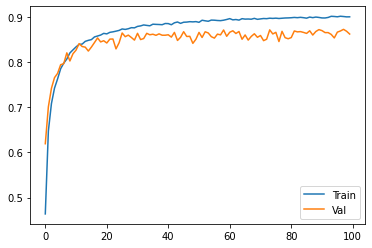

In [26]:
plt.plot(model.history.history['accuracy'],label='Train')
plt.plot(model.history.history['val_accuracy'],label='Val')
plt.legend()
plt.show()

In [28]:
score = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.6947 - accuracy: 0.8570


In [ ]:
print(score)

USANDO EARLYSTOPPING CALLBACKS

In [34]:
import tensorflow as tf

early = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=11)
model2 = model.fit(x_train, y_train, batch_size=64,
          callbacks=[early]
          )

704/704 [==============================] - 8s 10ms/step - loss: 0.4718 - accuracy: 0.9144


In [42]:
datagen = ImageDataGenerator(rotation_range=15,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  horizontal_flip=True,
                  vertical_flip=True)
checkpoint= tf.keras.callbacks.ModelCheckpoint(filepath='mi_primer_red_conv.hdf5',
                                   verbose=1,
                                   monitor='accuracy',
                                   save_best_only=True)

hist = model.fit(datagen.flow(x_train, y_train, batch_size=128),
          callbacks=[checkpoint],
          steps_per_epoch=x_train.shape[0] // 128, 
          epochs=10,
          verbose=2,
          validation_data=(x_valid, y_valid)
         )

Epoch 1/10

Epoch 1: accuracy improved from -inf to 0.79321, saving model to mi_primer_red_conv.hdf5
351/351 - 26s - loss: 0.7396 - accuracy: 0.7932 - val_loss: 0.7125 - val_accuracy: 0.8052 - 26s/epoch - 74ms/step
Epoch 2/10

Epoch 2: accuracy improved from 0.79321 to 0.79430, saving model to mi_primer_red_conv.hdf5
351/351 - 23s - loss: 0.7322 - accuracy: 0.7943 - val_loss: 0.6943 - val_accuracy: 0.8170 - 23s/epoch - 66ms/step
Epoch 3/10

Epoch 3: accuracy did not improve from 0.79430
351/351 - 23s - loss: 0.7338 - accuracy: 0.7942 - val_loss: 0.7323 - val_accuracy: 0.8064 - 23s/epoch - 67ms/step
Epoch 4/10

Epoch 4: accuracy did not improve from 0.79430
351/351 - 25s - loss: 0.7337 - accuracy: 0.7934 - val_loss: 0.6709 - val_accuracy: 0.8250 - 25s/epoch - 70ms/step
Epoch 5/10

Epoch 5: accuracy improved from 0.79430 to 0.79669, saving model to mi_primer_red_conv.hdf5
351/351 - 25s - loss: 0.7304 - accuracy: 0.7967 - val_loss: 0.7028 - val_accuracy: 0.8108 - 25s/epoch - 70ms/step
Epo

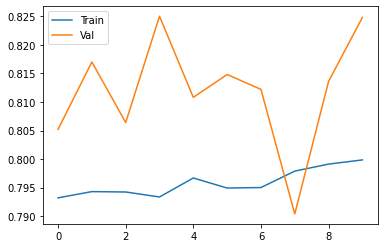

In [43]:
plt.plot(hist.history['accuracy'],label='Train')
plt.plot(hist.history['val_accuracy'],label='Val')
plt.legend()
plt.show()

In [44]:
model2 = model
model2.load_weights('./mi_primer_red_conv.hdf5')

In [45]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7210 - accuracy: 0.8124


[0.7210460901260376, 0.8123999834060669]